In [1]:
import skrf as rf # required for working with the .s2p files...
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import csv, glob
import os
import re
from collections import defaultdict

In [2]:
%matplotlib widget

In [15]:
def load_s2p_manual(filename):
    freq = []
    S11 = []
    S21 = []
    S12 = []
    S22 = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip().startswith('!') or line.strip().startswith('#'):
                continue
            parts = line.strip().split()
            if len(parts) != 9:
                continue
            freq.append(float(parts[0]) / 1e6)  # Hz to MHz
            S11.append(complex(float(parts[1]), float(parts[2])))
            S21.append(complex(float(parts[3]), float(parts[4])))
            S12.append(complex(float(parts[5]), float(parts[6])))
            S22.append(complex(float(parts[7]), float(parts[8])))
    return {
        "frequency": np.array(freq),
        "S11": np.array(S11),
        "S21": np.array(S21),
        "S12": np.array(S12),
        "S22": np.array(S22),
    }

In [74]:
def plot_lines(x, y, x_label="X", y_label="Y", title=None, legend_title="Label", xlim=None, ylim=None, label=None):
    """
    Plots a single line or multiple lines from a dictionary of Y values against a shared X array.

    Parameters
    ----------
    x : array-like
        Shared X-axis data.
    y : array-like or dict
        Either a single Y array or a dictionary mapping labels to Y arrays.
    """

    sns.set_context("paper")
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    fig, ax = plt.subplots(figsize=(12,4))

    if isinstance(y, dict):
        for lbl, y_array in sorted(y.items()):
            sns.lineplot(x=x, y=np.real(y_array), label=str(lbl), ax=ax, lw=1.2)
    else:
        sns.lineplot(x=x, y=np.real(y), label=label or "s-param", ax=ax, lw=1.2)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    if xlim:
        ax.set_xlim(*xlim)
    if ylim:
        ax.set_ylim(*ylim)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(axis='both', which='major', direction='in', length=6, width=1, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, bottom=True, left=True)

    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.85)

    ax.legend(
        title=legend_title if isinstance(y, dict) else None,
        fontsize=11,
        title_fontsize=11,
        loc="upper right",
        ncol=3,
        borderaxespad=0,
        frameon=True
    )

    fig.tight_layout()
    plt.show()

In [75]:
data = load_s2p_manual("/Users/rs_mbpro14/RAL/RFoF/may30_eigsep_front_end_test/may30_eFEM_fatten3db_test.s2p")

In [76]:
s21 = data["S21"]
s11 = data["S11"]
s12 = data["S12"]
s22 = data["S22"]
freq = data["frequency"]

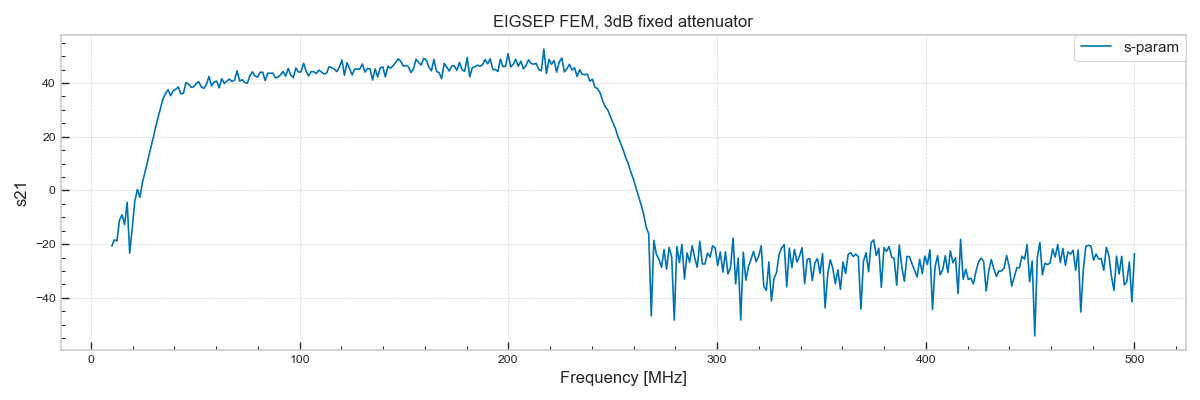

In [85]:
plot_lines(freq, s21, x_label="Frequency [MHz]", y_label="s21", title="EIGSEP FEM, 3dB fixed attenuator")

In [108]:
def load_single_csv(filename):
    freqs = []
    power = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        begin_found = False
        for row in reader:
            if not row or row[0].startswith("!"):
                continue
            if row[0] == "BEGIN":
                begin_found = True
                continue
            if begin_found:
                try:
                    freqs.append(float(row[0]) / 1e6) 
                    power.append(float(row[1]))
                except (ValueError, IndexError):
                    continue
    return freqs, power

In [109]:
pwr_data = "/Users/rs_mbpro14/RAL/RFoF/may30_eigsep_front_end_test/may30_eFEM_-75dbm.csv"
frqs, pwr = load_single_csv(pwr_data)

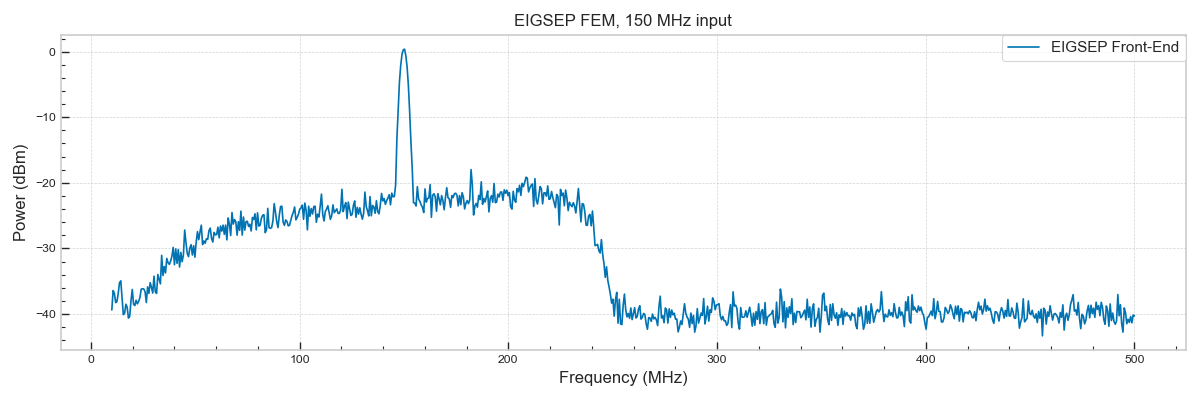

In [111]:
plot_lines(frqs, pwr, x_label='Frequency (MHz)', y_label='Power (dBm)', label="EIGSEP Front-End", title="EIGSEP FEM, 150 MHz input")